In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# размер дома (в м²)
X = np.array([50, 60, 80, 100, 120, 150])
# цена дома (в тыс. $)
y = np.array([150, 180, 240, 300, 330, 390])

In [6]:
def predict(x, w, b):
    return w * x + b

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

In [7]:
def mean_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / len(y_true)

In [8]:
w = 2.14
b = 69
y_pred = predict(X, w, b)
mean_squared_error(y, y_pred)

np.float64(214.24)

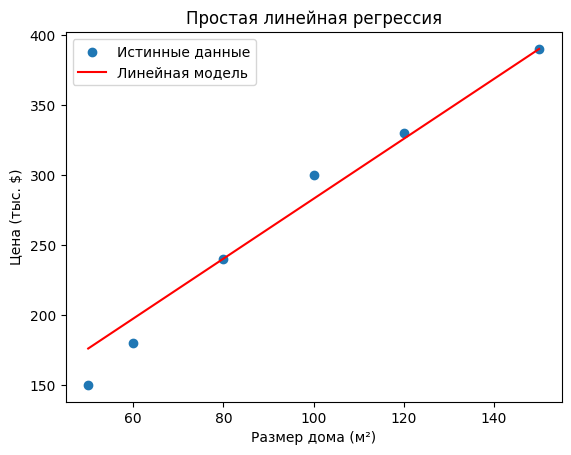

In [9]:
plt.scatter(X, y, label="Истинные данные")
plt.plot(X, y_pred, color='red', label="Линейная модель")
plt.xlabel("Размер дома (м²)")
plt.ylabel("Цена (тыс. $)")
plt.legend()
plt.title("Простая линейная регрессия")
plt.show()

# МНК
$$
w = \frac{\sum_{i=1}^{m} (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sum_{i=1}^{m} (x^{(i)} - \bar{x})^2}
$$

$$
b = \bar{y} - w \cdot \bar{x}
$$

In [10]:
np.sum(X - np.mean(X))

np.float64(2.842170943040401e-14)

In [11]:
def least_squares_fit(X, y):
    w = np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    b = np.mean(y) - w * np.mean(X)
    return w, b

In [12]:
w, b = least_squares_fit(X, y)
print(f'Наилучшие коэффициенты:\nw = {w:.2f}\nb = {b:.2f}\ny = {w:.2f}x + {b:.2f}')

Наилучшие коэффициенты:
w = 2.41
b = 39.95
y = 2.41x + 39.95


In [13]:
y_pred = predict(X, w, b)
mean_squared_error(y_pred=y_pred, y_true=y)

np.float64(112.85046728971952)

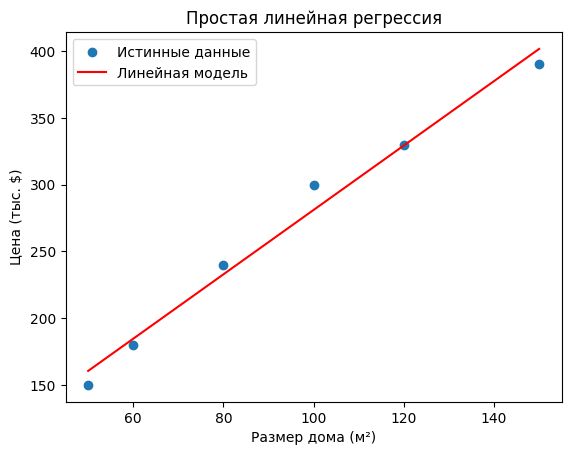

In [14]:
plt.scatter(X, y, label="Истинные данные")
plt.plot(X, y_pred, color='red', label="Линейная модель")
plt.xlabel("Размер дома (м²)")
plt.ylabel("Цена (тыс. $)")
plt.legend()
plt.title("Простая линейная регрессия")
plt.show()

# Градиентный спуск

In [15]:
def gradient_descent_single(X, y, learning_rate=0.0001, num_iterations=1000):
    '''
    выполняет градиентный спуск простой линейной регрессии y = wx + b.
    args:
        X (np.array): Массив признаков
        y (np.array): Массив целевых значений
        learning_rate (float): Скорость обучения
        num_iterations (int): Число итераций.
    returns:
        w (float): наклон линии
        b (float): свободный член
        losses (list): список значений функции потерь на каждой итерации
    '''
    n = len(X)
    w = 0.0
    b = 0.0
    losses = []

    for i in range(num_iterations):
        y_pred = predict(X, w, b)

        # градиенты
        dw = -(2/n) * np.sum((y - y_pred) * X)
        db = -(2/n) * np.sum(y - y_pred)

        # обновляем параметры
        w -= learning_rate * dw
        b -= learning_rate * db

        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        # выводим прогресс каждые 100 итераций
        if (i + 1) % 100 == 0:
            print(f"Итерация {i + 1}, w={w:.4f}, b={b:.4f}, MSE: {loss:.4f}")

    return w, b, losses

In [16]:
learning_rate = 0.0001
num_iterations = 1000
w, b, losses = gradient_descent_single(X, y, learning_rate, num_iterations)

print(f"\nНайденные параметры: w = {w:.4f}, b={b:.4f}")

Итерация 100, w=2.4103, b=0.1185, MSE: 1763.5025
Итерация 200, w=2.7350, b=0.2171, MSE: 329.0916
Итерация 300, w=2.7781, b=0.3128, MSE: 302.0489
Итерация 400, w=2.7831, b=0.4080, MSE: 300.6682
Итерация 500, w=2.7830, b=0.5029, MSE: 299.7595
Итерация 600, w=2.7822, b=0.5975, MSE: 298.8638
Итерация 700, w=2.7814, b=0.6919, MSE: 297.9724
Итерация 800, w=2.7805, b=0.7861, MSE: 297.0854
Итерация 900, w=2.7796, b=0.8800, MSE: 296.2026
Итерация 1000, w=2.7787, b=0.9737, MSE: 295.3240

Найденные параметры: w = 2.7787, b=0.9737


In [17]:
y_pred = predict(X, w, b)
print(f"Предсказанные значения: {y_pred}")
print(f"Финальное MSE: {mean_squared_error(y, y_pred):.4f}")

Предсказанные значения: [139.90890488 167.69593599 223.26999822 278.84406045 334.41812268
 417.77921603]
Финальное MSE: 295.3153


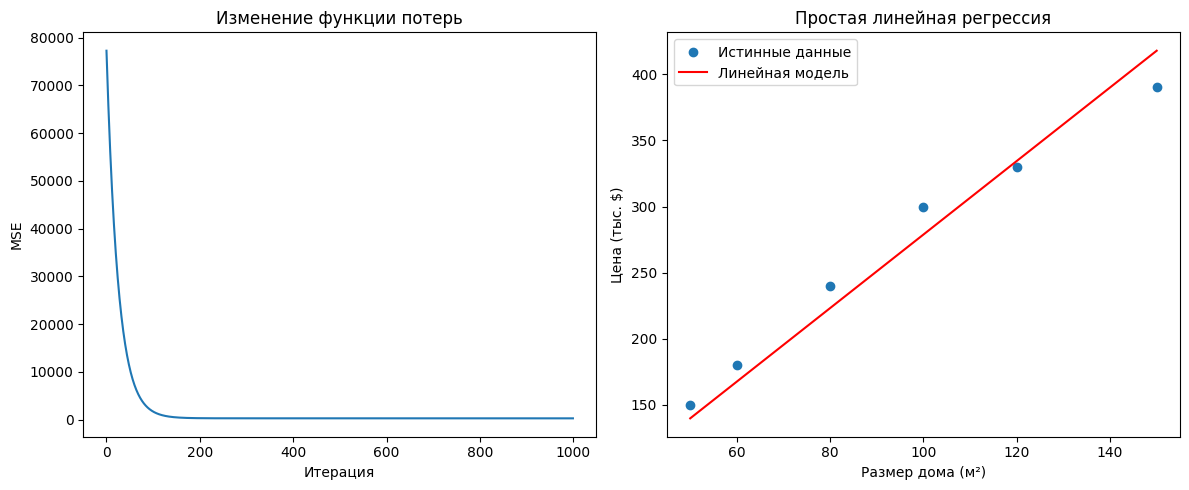

In [18]:
# Визуализация функции потерь
plt.figure(figsize=(12, 5))

#График 1: Функция потерь
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Итерация")
plt.ylabel("MSE")
plt.title("Изменение функции потерь")

#График 2: Данные и модель
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Истинные данные")
plt.plot(X, y_pred, color="red", label="Линейная модель")
plt.xlabel("Размер дома (м²)")
plt.ylabel("Цена (тыс. $)")
plt.title("Простая линейная регрессия")

plt.legend()
plt.tight_layout()
plt.show()

# Многомерная Линейная регрессия

Для k признаков модель выглядит так:
$$
\hat{y}_{i} = w_{0} + w_{1} x_{i1} + w_{2}x_{i2} + ... + w_{k}x_{ik}
$$
В матричной форме:
$$ \hat{y} = Xw $$
где:
 - $X$ - матрица $n x (k + 1)$, где $n$ - число наблюдений, $k$ - число признаков, а первый стобец состоит из единиц (для $w_0$),
 - $w$ = $[w_0, w_1, ... , w_k]^{T}$ - вектор параметров
 - $\hat{y}$ - вектор предсказаний
   

In [19]:
X = np.array([
    [50, 2],
    [60, 2],
    [80, 3],
    [100, 3],
    [120, 4],
    [150, 5],
])
y = np.array([150, 180, 240, 300, 330, 390])

In [20]:
# Нормализация данных
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
y_mean = y.mean()
y_std = y.std()

X_norm = (X - X_mean) / X_std
y_norm = (y - y_mean) / y_std

In [21]:
np.c_[np.ones(X.shape[0]), X]

array([[  1.,  50.,   2.],
       [  1.,  60.,   2.],
       [  1.,  80.,   3.],
       [  1., 100.,   3.],
       [  1., 120.,   4.],
       [  1., 150.,   5.]])

In [22]:
def predict_multi(X, w):
    '''вычисляет предсказания модели y^ = Xw
    X.shape[0]- число наблюдений
    np.ones(X.shape[0]) - создает вектор из единиц длиной 6
    np.c_ - конкатенация массивов по столбцам. Добавляем стобец к матрице X, чтобы учесть свободный член w_0.
    X_with_bias @ w - матричное умножение. w - вектор 3х1: [w_0, w_1, w_2].
    
    y^_i = 1 * w_0 + x_i0 * w_1 + x_i1 * w_2
    '''
    
    X_with_bias = np.c_[np.ones(X.shape[0]), X] # Добавляем столбец единиц
    return X_with_bias @ w

Градиент функции потерь:
$$
∇J(w) = -\frac{2}{n}X^{T}(y-\hat{y})
$$
Обновляем параметры:
$$
w ← w - η∇J(w)
$$

In [23]:
def gradient_descent_multi(X, y, learning_rate=0.01, num_iterations=1000, tol=1e-5):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    n = X.shape[0]
    k = X.shape[1]
 
    w = np.zeros(k + 1) # # [w_0, w_1, ..., w_k]
    losses = []

    for i in range(num_iterations):
        y_pred = X_with_bias @ w
        gradient = -(2/n) * X_with_bias.T @ (y - y_pred)
        w -= learning_rate * gradient
        # print(f'gradient: {gradient}')
        # print(f'w: {w}') 
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)

        if i > 0 and abs(losses[-1] - losses[-2]) < tol:
            print(f"Сходимость достигнута на итерации {i + 1}")
            break
        if (i + 1) % 100 == 0:
            print(f"Итерация {i + 1}, MSE (нормализованное): {loss:.4f}")

    return w, losses
    

In [24]:
learning_rate = 0.1
num_iterations = 1000
w_norm, losses = gradient_descent_multi(X_norm, y_norm, learning_rate, num_iterations)

Итерация 100, MSE (нормализованное): 0.0243
Итерация 200, MSE (нормализованное): 0.0172
Итерация 300, MSE (нормализованное): 0.0139
Итерация 400, MSE (нормализованное): 0.0123
Сходимость достигнута на итерации 409


In [25]:
# Преобразуем параметры обратно в исходный масштаб
w_0 = y_mean + w_norm[0] * y_std - np.sum(w_norm[1:] * y_std * X_mean / X_std)
w_rest = w_norm[1:] * y_std / X_std
w = np.concatenate([[w_0], w_rest])

In [26]:
print(f"\nНайденные параметры: w_0 = {w[0]:.4f}, w_1 = {w[1]:.4f}, w_2 = {w[2]:.4f}")


Найденные параметры: w_0 = 45.6116, w_1 = 2.8478, w_2 = -14.6548


In [27]:
y_pred = predict_multi(X, w)
print(f"Предсказанные значения: {y_pred}")
print(f"Финальное MSE: {mean_squared_error(y, y_pred):.4f}")

Предсказанные значения: [158.69233552 187.17039261 229.47172144 286.42783562 328.72916445
 399.50855037]
Финальное MSE: 85.6745


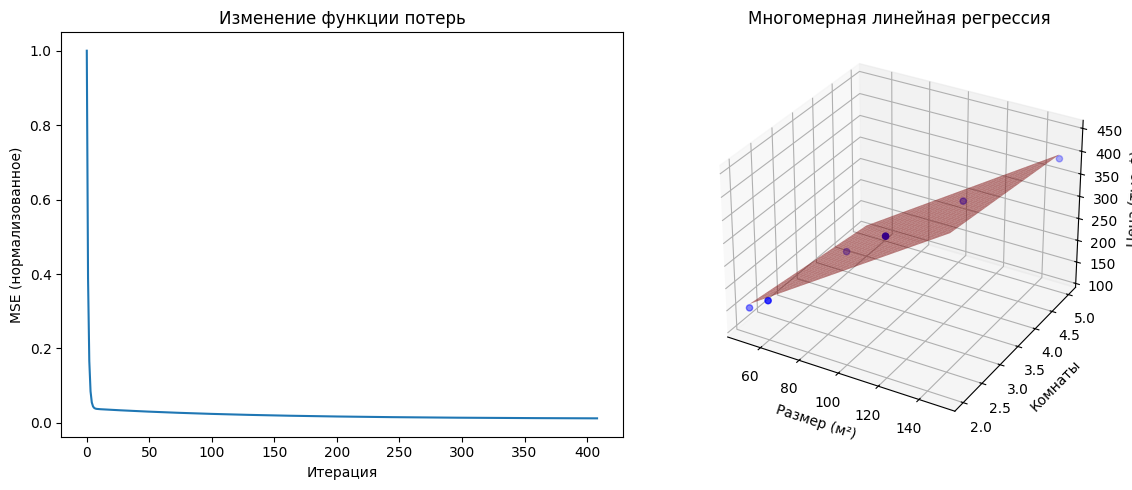

In [28]:
# Визуализация функции потерь
plt.figure(figsize=(12, 5))

# График 1: Функция потерь
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Итерация")
plt.ylabel("MSE (нормализованное)")
plt.title("Изменение функции потерь")

# График 2: 3D-график данных и модели
plt.subplot(1, 2, 2, projection='3d')
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Истинные данные')

# Создаём сетку для плоскости
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1, x2 = np.meshgrid(x1_range, x2_range)
y_plane = w[0] + w[1] * x1 + w[2] * x2

ax.plot_surface(x1, x2, y_plane, color='red', alpha=0.5, label='Модель')
ax.set_xlabel('Размер (м²)')
ax.set_ylabel('Комнаты')
ax.set_zlabel('Цена (тыс. $)')
plt.title('Многомерная линейная регрессия')

plt.tight_layout()
plt.show()

# Линейная регрессия с scikit-learn

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [30]:
# Создаем модель
model = LinearRegression()

# Обучаем модель
model.fit(X, y)

# Получаем параметры
w_0 = model.intercept_
w_1, w_2 = model.coef_
print(f"Параметры: w_0 = {w_0:.4f}, w_1 = {w_1:.4f}, w_2 = {w_2:.4f}")

# Делаем предсказания
y_pred = model.predict(X)
print(f"Предсказанные значения: {y_pred}")
print(f"MSE: {mean_squared_error(y, y_pred):.4f}")

Параметры: w_0 = 49.7222, w_1 = 3.3056, w_2 = -29.4444
Предсказанные значения: [156.11111111 189.16666667 225.83333333 291.94444444 328.61111111
 398.33333333]
MSE: 76.3889


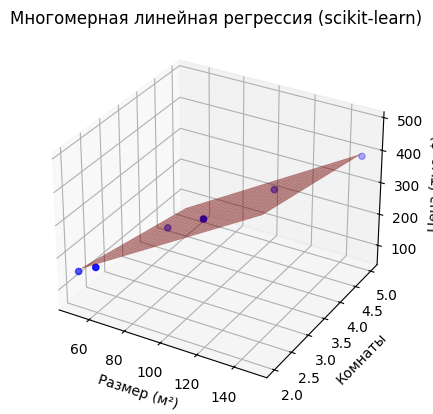

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Истинные данные')

# Создаём сетку для плоскости
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1, x2 = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_plane = model.predict(X_grid).reshape(x1.shape)

ax.plot_surface(x1, x2, y_plane, color='red', alpha=0.5, label='Модель')
ax.set_xlabel('Размер (м²)')
ax.set_ylabel('Комнаты')
ax.set_zlabel('Цена (тыс. $)')
plt.title('Многомерная линейная регрессия (scikit-learn)')
plt.show()

## Линейная регрессия с регуляризацией

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Ridge-регрессия
Ridge добавляет L2-штраф:
$$ J(w) = \frac{1}{n}\sum^{n}_{i=1}(y_{i} - \hat{y_{i}})^{2} + \alpha\sum^{k}_{j=1}w^{2}_{j}$$

In [38]:
from sklearn.linear_model import Ridge, Lasso

# Ridge-регрессия
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# параметры
print(f'Ridge-регрессия: w_0 = {ridge.intercept_:.4f}, w_1 = {ridge.coef_[0]:.4f}, w_2 = {ridge.coef_[1]:.4f}')

# предсказание
y_pred_ridge = ridge.predict(X)
print(f'MSE (Ridge): {mean_squared_error(y, y_pred_ridge):.4f}')

Ridge-регрессия: w_0 = 265.0000, w_1 = 45.3861, w_2 = 30.7623
MSE (Ridge): 276.4050


### Lasso-регрессия
Ridge добавляет L1-штраф:
$$ J(w) = \frac{1}{n}\sum^{n}_{i=1}(y_{i} - \hat{y_{i}})^{2} + \alpha\sum^{k}_{j=1}|w_{j}|$$

In [39]:
# Lasso-регрессия
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# параметры
print(f'Lasso-регрессия: w_0 = {lasso.intercept_:.4f}, w_1 = {lasso.coef_[0]:.4f}, w_2 = {lasso.coef_[1]:.4f}')

# предсказание
y_pred_lasso = lasso.predict(X)
print(f'MSE (Lasso): {mean_squared_error(y, y_pred_lasso):.4f}')

Lasso-регрессия: w_0 = 265.0000, w_1 = 82.1393, w_2 = -0.0000
MSE (Lasso): 113.8505
